<a href="https://colab.research.google.com/github/DataScienceHandsOn21/DataScienceHandsOn21/blob/main/Case_Study_CohortAnalysis_TransactionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing utilities
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import missingno as msno
from textwrap import wrap

In [ ]:
#Loading and Reading data
#Uploading data from the loacal drive
from google.colab import files
uploaded = files.upload()

Saving TransactionEcommerce.xlsx to TransactionEcommerce.xlsx


In [ ]:
import io
from io import StringIO
df_customer = pd.read_excel(io.BytesIO(uploaded['TransactionEcommerce.xlsx']))

In [ ]:
#Checking data
df_customer.head(20)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


In [ ]:
#Segregating numeric and Non numeric columns
numeric_cols = df_customer.select_dtypes(include = ['number']).columns
print(numeric_cols)

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'list_price', 'standard_cost', 'product_first_sold_date'],
      dtype='object')


In [ ]:
non_numeric_cols = df_customer.select_dtypes(exclude = ['number']).columns
print(non_numeric_cols)

Index(['transaction_date', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size'],
      dtype='object')


In [ ]:
df_customer[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   online_order             19640 non-null  float64
 4   list_price               20000 non-null  float64
 5   standard_cost            19803 non-null  float64
 6   product_first_sold_date  19803 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.1 MB


In [ ]:
df_customer[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  20000 non-null  datetime64[ns]
 1   order_status      20000 non-null  object        
 2   brand             19803 non-null  object        
 3   product_line      19803 non-null  object        
 4   product_class     19803 non-null  object        
 5   product_size      19803 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 937.6+ KB


In [ ]:
#calculating the percentage of missing values by columns
pct_missing = df_customer.isna().mean()
pct_missing[:20]

transaction_id             0.00000
product_id                 0.00000
customer_id                0.00000
transaction_date           0.00000
online_order               0.01800
order_status               0.00000
brand                      0.00985
product_line               0.00985
product_class              0.00985
product_size               0.00985
list_price                 0.00000
standard_cost              0.00985
product_first_sold_date    0.00985
dtype: float64

In [ ]:
#columns with over 0.01% missing values
pct_missing[pct_missing>.01]

online_order    0.018
dtype: float64

In [ ]:
#Missing value by rows
missing_by_row = df_customer.isna().sum(axis = 1)
missing_by_row.sum()

1542

In [ ]:
#Inspecting the missing values in entire dataset
df_customer.isnull().values.sum()

1542

In [ ]:
#Replacing the missing values" "s with NaaN
df_customer = df_customer.replace(" ", np.NaN)
df_customer

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [ ]:
#Imputing the missing values in numeric columns with mean
df_customer[numeric_cols] = df_customer[numeric_cols].fillna(df_customer[numeric_cols].mean())

In [ ]:
df_customer[numeric_cols].isnull().values.sum()#There are no null values in numeric columns

0

In [ ]:
#Impute the non-numeric columns with their most frequent values.
most_freq = df_customer[non_numeric_cols].describe().loc['top']
most_freq#Below are the top words in each columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


transaction_date    2017-02-14 00:00:00
order_status                   Approved
brand                             Solex
product_line                   Standard
product_class                    medium
product_size                     medium
Name: top, dtype: object

In [ ]:
#Using most frequesnt to fill in the missing column
df_customer[non_numeric_cols] = df_customer[non_numeric_cols].fillna(most_freq)
df_customer[non_numeric_cols].isnull().values.sum()#There no null value in the nin_numeric_cols

0

In [ ]:
#Alternatively, we can itetate over using for loop
#for col in df_customer.non_numeric_cols:
    # Check if the column is of object type
   # if df_customer[non_numeric_cols].dtypes == 'object':
        # Impute with the most frequent value
       # df_customer[col] = df_customer[col].fillna(df_customer[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
#df_customer.isnull().values.sum())

In [ ]:
df_customer[numeric_cols].describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.495492,582.825242,403.951280,2861.004990
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,0.500458,1163.890000,507.580000,38206.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


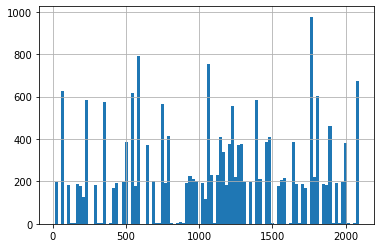

In [ ]:
#Checking for irregular data (Outliers)
df_customer["list_price"].hist(bins = 100)

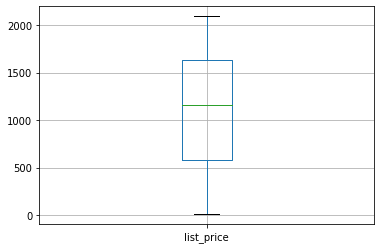

In [ ]:
df_customer.boxplot(column=["list_price"])

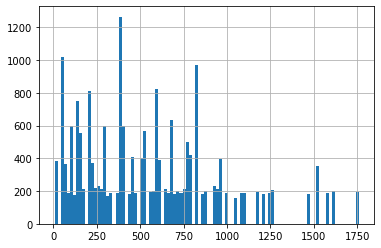

In [ ]:
#Checking outlier
df_customer["standard_cost"].hist(bins = 100)

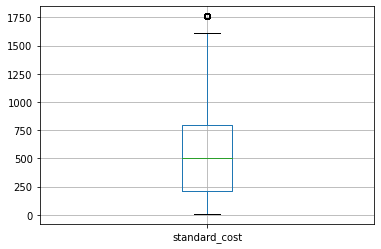

In [ ]:
df_customer.boxplot(column = ["standard_cost"])

In [ ]:
df_customer

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [ ]:
#Assigned the cohorts and calculated the monthly offset
#function to parse the date Time based cohort: 1 day of every month
def get_month(x):
  return dt.datetime(x.year, x.month,1 )
#Create transaction_date column based on month and store in TransactionMonth
df_customer["Transaction_Month"] = df_customer['transaction_date'].apply(get_month)

In [ ]:
#Grouping by customer_id and selecting Invoice Month value
grouping = df_customer.groupby("customer_id")["Transaction_Month"]
#Assigning a minimum InvoiceMonth value to the dataset
df_customer["CohortMonth"] = grouping.transform("min")



In [ ]:
#Checking for Transaction_Month and Cohort_Month
df_customer[["Transaction_Month","CohortMonth"]]

,Transaction_Month,CohortMonth
0,2017-02-01,2017-02-01
1,2017-05-01,2017-01-01
2,2017-10-01,2017-01-01
3,2017-08-01,2017-02-01
4,2017-10-01,2017-01-01
...,...,...
19995,2017-06-01,2017-01-01
19996,2017-11-01,2017-01-01
19997,2017-04-01,2017-04-01
19998,2017-07-01,2017-02-01


In [ ]:
#Calculating time offset in Month as Cohort Index
#To evaluate the metrics for each cohort in a comparable way
# Creating the six variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [ ]:
def get_date_int(df, column):
  year = df[column].dt.year
  month = df[column].dt.month
  day = df[column].dt.day
  return year, month, day

  # Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(df_customer, 'Transaction_Month')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(df_customer, 'CohortMonth')

In [ ]:
#Calculating the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two.

In [ ]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month

In [ ]:
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """
df_customer['CohortIndex'] = years_diff * 12 + months_diff  + 1 
print(df_customer.head(5))

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date Transaction_Month  \
0       71.49    

In [ ]:
#Creating a group() object with CohortMonth and CohortIndex and store it as a grouping.

# Counting daily active user from each chort
grouping = df_customer.groupby(['CohortMonth', 'CohortIndex'])

In [ ]:
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

In [ ]:
# Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')

In [ ]:
# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [ ]:
#Calculating the Retention Rate
#percentage of active customers compared to the total number of customers after a specific time interval

In [ ]:
#Calculating the retention count for each cohort Month paired with cohort Index
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [ ]:
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Insights:
'''The retention rate dataframe represents Customer retained across Cohorts. 
Index value represents the Cohort
Columns represent the number of months since the current Cohort'''
'''Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
 The retention rate may increase or decrease in subsequent Indexes.
 Values towards the bottom right have a lot of NaN values.'''

In [ ]:
#Insights:
''' 12 cohorts for each month and 12 cohort indexes werer created.In 2017-07 cohort Month in 5th Cohort Index, 48% of cohorts that signed in July 2017 were active 5 months later.'''